In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

E:\conda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
E:\conda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [8]:
from sklearn.svm import LinearSVC
linear_svm=LinearSVC().fit(X,y)

E:\conda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

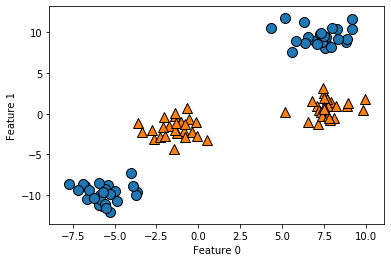

In [3]:
#svm
X,y = sklearn.datasets.make_blobs(centers=4,random_state=8)
y = y%2

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

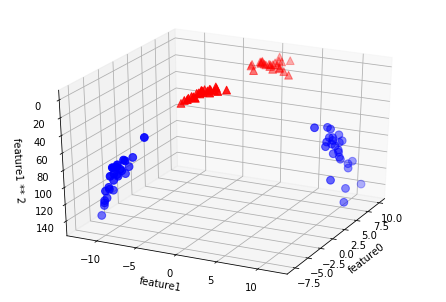

In [11]:
#添加第二个特征的平方，作为一个新特征
X_new = np.hstack([X,X[:, 1:] **2 ])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
#3D可视化
ax = Axes3D(figure,elev=-152,azim=-26)
#首先划出所有y==0的点，然后画出所有y==1的点
mask = y == 0
ax.scatter(X_new[mask, 0],X_new[mask, 1],X_new[mask, 2], c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask, 0],X_new[~mask, 1],X_new[~mask, 2], c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

E:\conda\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

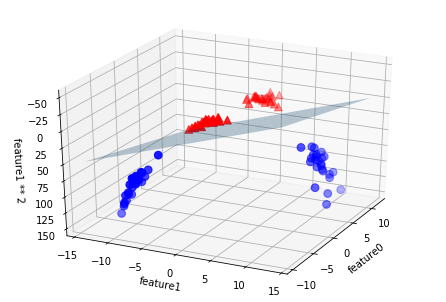

In [10]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
#显示先行决策边界
figure = plt.figure()
ax = Axes3D(figure, elev=-152,azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2,X_new[:, 0].max() + 2,50)
yy = np.linspace(X_new[:, 1].min() - 2,X_new[:, 1].max() + 2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX +coef[1]*YY +intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride=8,cstride=8,alpha=0.3)
ax.scatter(X_new[mask, 0],X_new[mask, 1],X_new[mask, 2], c='b',cmap=mglearn.cm2,s=60)
ax.scatter(X_new[~mask, 0],X_new[~mask, 1],X_new[~mask, 2], c='r',marker='^',cmap=mglearn.cm2,s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

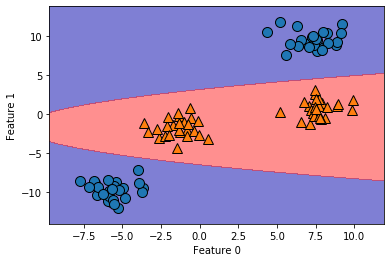

In [12]:
#此时的svm实际上不是线性的，不是直线而是椭圆
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],cmap=mglearn.cm2,alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
#向数据中添加非线性特征，可以增强线性模型
#核技巧直接计算扩展特征表示中数据点的内积
#常用方法：多项式核，计算所有可能的多项式
#径向基函数rbf，高斯核，无限维特征空间，阶数越高，特征重要性越小
#支持向量，位于类别之间边界上的那些点，对定义决策边界来说很重要

Text(0, 0.5, 'Feature 1')

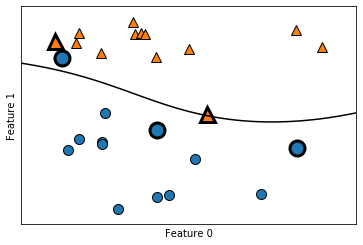

In [15]:
from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
#画出支持向量
sv = svm.support_vectors_
#支持向量的类别标签由dual_coef_的正负号给出
sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

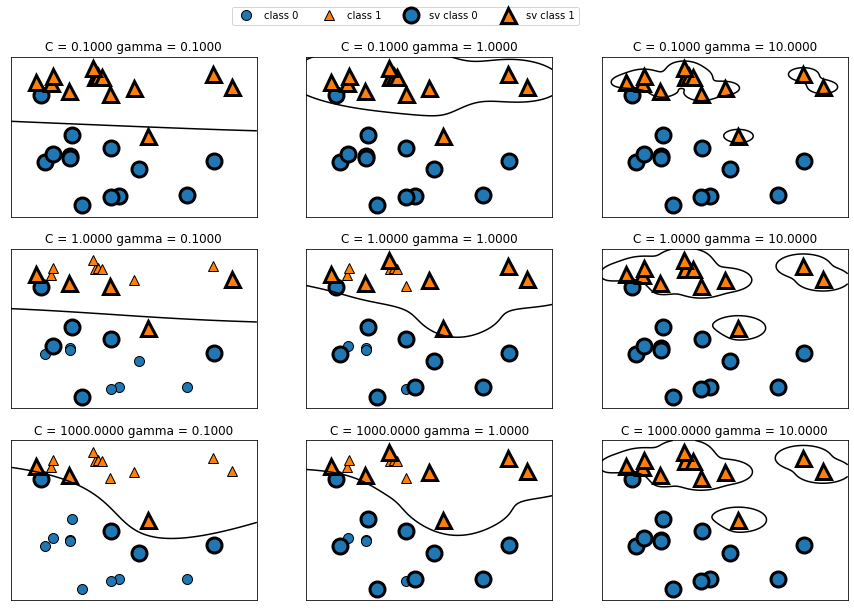

In [16]:
#gamma控制高斯核的宽度，决定点与点之间的“靠近”是指多大距离
#C是正则化参数，限制每个点的重要性（dual_coef_）
fig,axes = plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma,ax=a)

axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],ncol=4,loc=(.9,1.2))


In [ ]:
#gamma较小，高斯核半径较大，决策边界变化较慢，模型较简单
#c值增大，决策边界弯曲，更关注一些边界点的正确分类
#默认c=1，gamma=1/features

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

svc = SVC()
svc.fit(X_train,y_train)

print("Accuracy on training set:{:.2f}".format(svc.score(X_train,y_train)))
print("Accuracy on test set:{:.2f}".format(svc.score(X_test,y_test)))

Accuracy on training set:0.90
Accuracy on test set:0.94


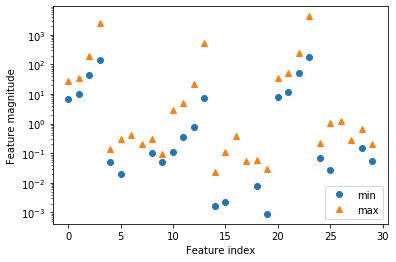

In [19]:
plt.plot(X_train.min(axis=0),'o',label="min")
plt.plot(X_train.max(axis=0),'^',label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

In [20]:
#预处理数据
#计算每个特征的最小值
min_on_training = X_train.min(axis=0)
#计算训练集中每个特征的范围（最大值-最小值）
range_on_training = (X_train - min_on_training).max(axis=0)

#减去最小值除以范围
#每个特征都是min为0 max为1
X_train_scaled = (X_train - min_on_training)/range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [21]:
#利用训练集的最小值和范围对测试集做相同的变化
X_test_scaled = (X_test - min_on_training)/range_on_training

In [22]:
svc = SVC()
svc.fit(X_train_scaled,y_train)

print("Accuracy on training set:{:.2f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.2f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set:0.98
Accuracy on test set:0.97


In [23]:
#可能模型在0.22做了些优化，这个默认参数的精度已经非常高了
svc = SVC(C=1000)
svc.fit(X_train_scaled,y_train)

print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.958


In [24]:
svc = SVC(C=100)
svc.fit(X_train_scaled,y_train)

print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set:1.000
Accuracy on test set:0.965


In [25]:
svc = SVC(C=10)
svc.fit(X_train_scaled,y_train)

print("Accuracy on training set:{:.3f}".format(svc.score(X_train_scaled,y_train)))
print("Accuracy on test set:{:.3f}".format(svc.score(X_test_scaled,y_test)))

Accuracy on training set:0.988
Accuracy on test set:0.972


In [ ]:
#支持向量机666，对低维高维数据表现都很好
#对样本个数的缩放表现不好，100000+的数据对时间内存要求较高
#预处理调参都要注意
#难以检查，难以解释，当所有特征的测量单位相似时范围相差不多时适用
#C正则化参数，核的选择，核相关参数，高斯核rbf中gamma指宽度的倒数，C与gamma越大模型越复杂

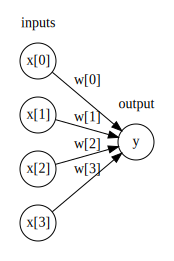

In [26]:
#最6的神经网络
#多层感知机mlp，普通前馈神经网络
display(mglearn.plots.plot_logistic_regression_graph())

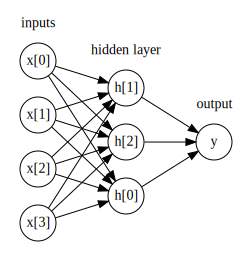

In [27]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x),tanh(x)')

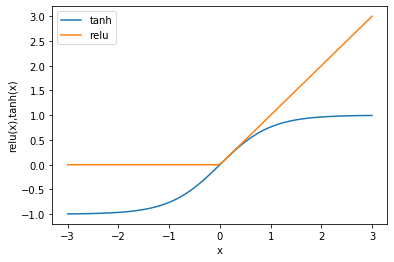

In [28]:
#计算每个隐单元加权求和后，应用校正非线性或正切双曲线，再加权求和
#relu截断小于0的值，tanh在输入值较小时接近-1，较大时接近+1
line = np.linspace(-3,3,100)
plt.plot(line,np.tanh(line),label="tanh")
plt.plot(line,np.maximum(line,0),label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x),tanh(x)")

Text(0.5, 0, 'Feature 1')

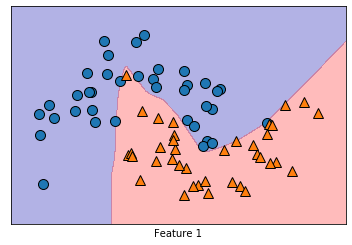

In [30]:
#隐层中节点个数，对较小较简单的数据集，值可以小到10，对复杂数据，值可以达到10000
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100,noise=0.25,random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

E:\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0.5, 0, 'Feature 1')

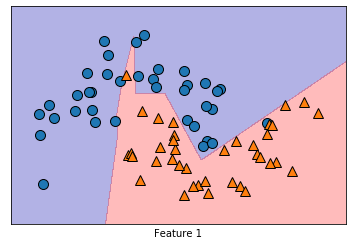

In [37]:
#默认使用100个隐结点
#减少数量
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

Text(0.5, 0, 'Feature 1')

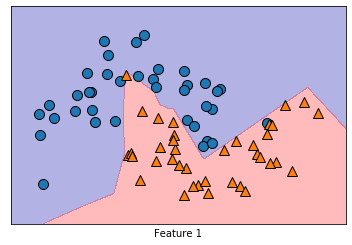

In [39]:
#实用两个隐层，每个包含10个单元
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

Text(0.5, 0, 'Feature 1')

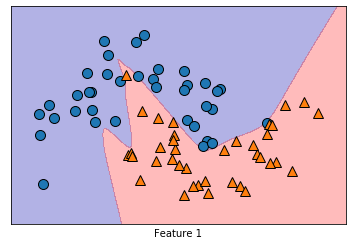

In [40]:
#使用2个隐层，使用tanh非线性
mlp = MLPClassifier(solver='lbfgs',activation='tanh',random_state=0,hidden_layer_sizes=[10,10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

E:\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\conda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

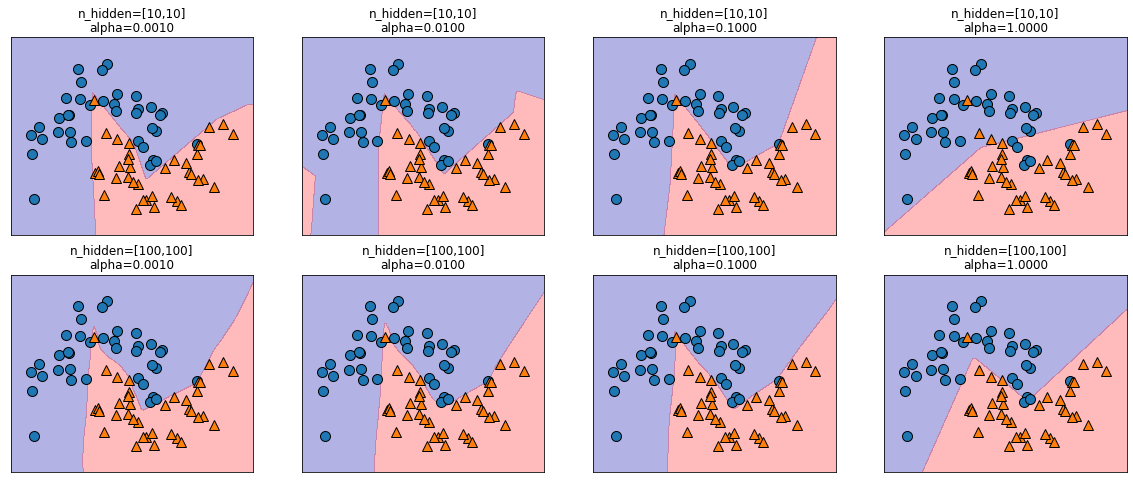

In [41]:
#利用l2正则化，控制复杂度，使用alpha，越小正则化越弱模型模型越复杂
fig,axes = plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes,[10,100]):
    for ax,alpha in zip(axx,[0.001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[n_hidden_nodes,n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
        mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes,n_hidden_nodes,alpha))

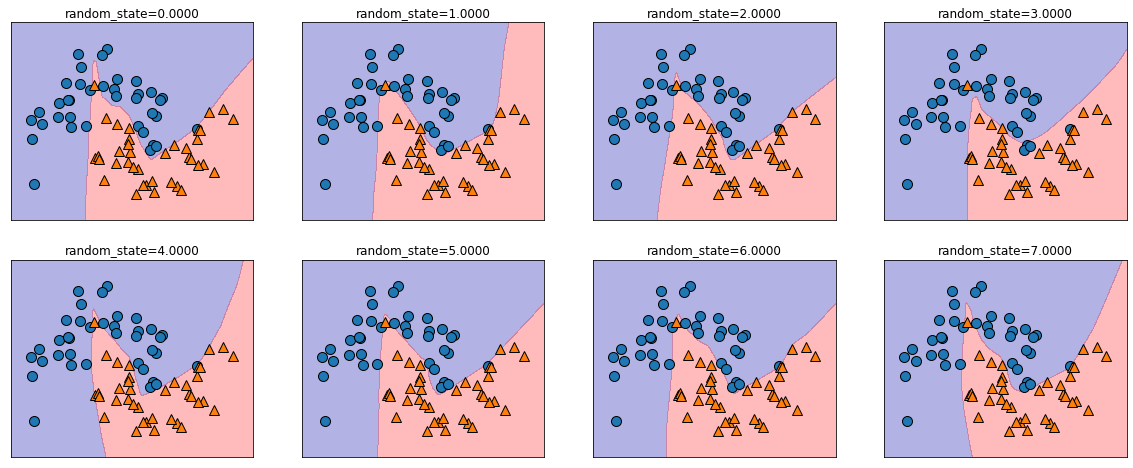

In [43]:
#隐层个数，每个隐层中单元个数，正则化
#学习前权重随机设置
#随机数种子在网络较小时有可能得到不一样的模型
fig,axes = plt.subplots(2,4,figsize=(20,8))
for i,ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs',random_state=i,hidden_layer_sizes=[100,100])
    mlp.fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(mlp,X_train,fill=True,alpha=.3,ax=ax)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)
    ax.set_title("random_state={:.4f}".format(i))